<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/6_3_house_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 탐색 시, 그래프 표시를 위한 환경 설정

In [1]:
# 나눔폰트 설치(설치 후, 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #한글폰트 설정
plt.rc('axes', unicode_minus=False) #마이너스 기호 표시

# 문제1
데이터 셋을 불러오고, 아래 항목을 확인하시오
-	상위 5개 항목 출력
-	데이터의 주요 통계지표 확인

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/refs/heads/main/dataset/exercise4.csv', index_col=None)

In [4]:
df.head()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
0,83.910,16.0,67.021277,31.346578,34.8
1,88.920,24.0,55.319149,38.714128,36.6
2,95.925,96.0,80.851064,31.843267,43.4
3,100.170,16.0,36.170213,12.527594,57.2
4,92.430,8.0,22.340426,15.728477,48.2


In [5]:
df.describe()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,94.228740,37.976000,62.238298,30.096302,45.058000
std,10.544196,34.710359,23.038239,19.632020,18.237724
min,53.415000,4.000000,0.000000,0.000000,10.000000
25%,88.245000,16.000000,50.797872,14.514349,34.200000
50%,93.127500,20.000000,68.085106,26.572848,42.400000
75%,99.307500,96.000000,80.851064,41.901214,50.000000
max,131.700000,96.000000,100.000000,100.000000,100.000000


# 문제2
각 특성의 데이터 분포 확인하기 위해 시각화하시오.
-	시각화 방법: 히스토그램(`kde`=True, `bins`=30)
-	5개의 속성을 각각 표시하도록 서브플롯(subplot)을 생성

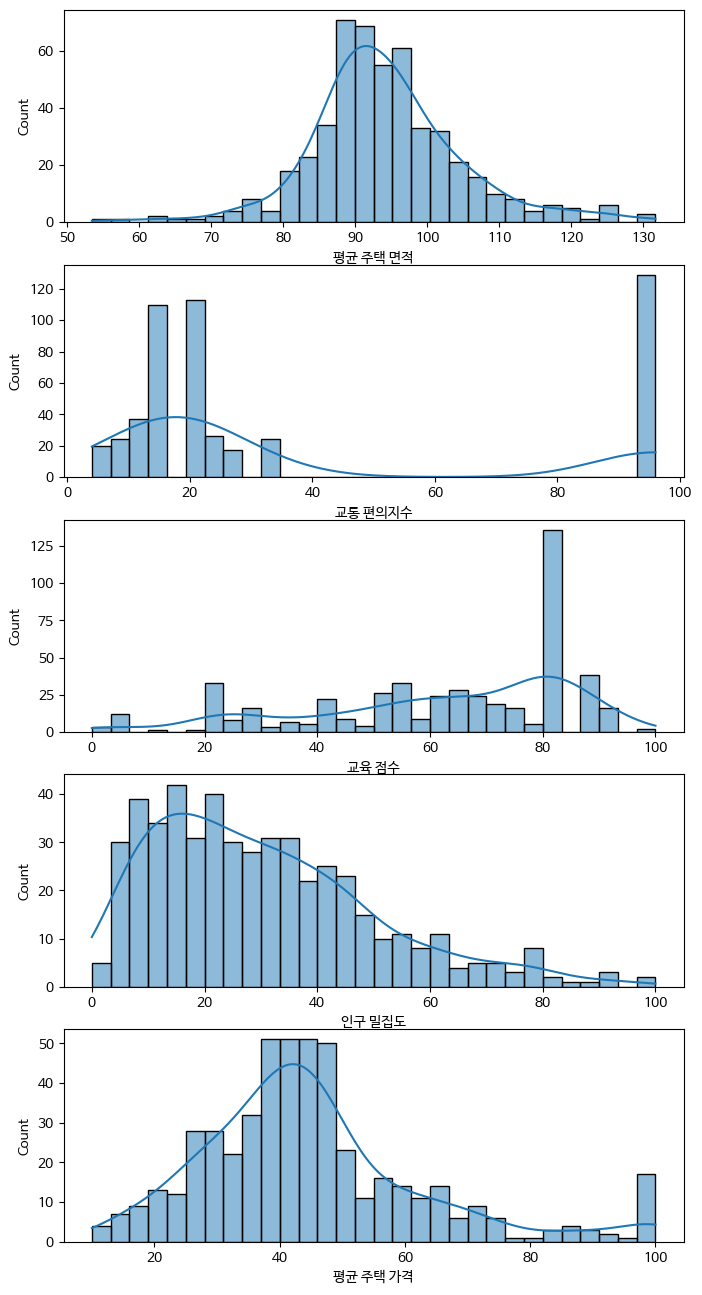

In [6]:
# 데이터 분포 확인 - 히스토그램
nrows = 5
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns)):
    sns.histplot(x=df.columns[i], data=df, kde=True, bins=30, ax=axs[i])

# 문제3
`평균 주택 가격`과 가장 상관관계가 높은 속성을 확인하시오.

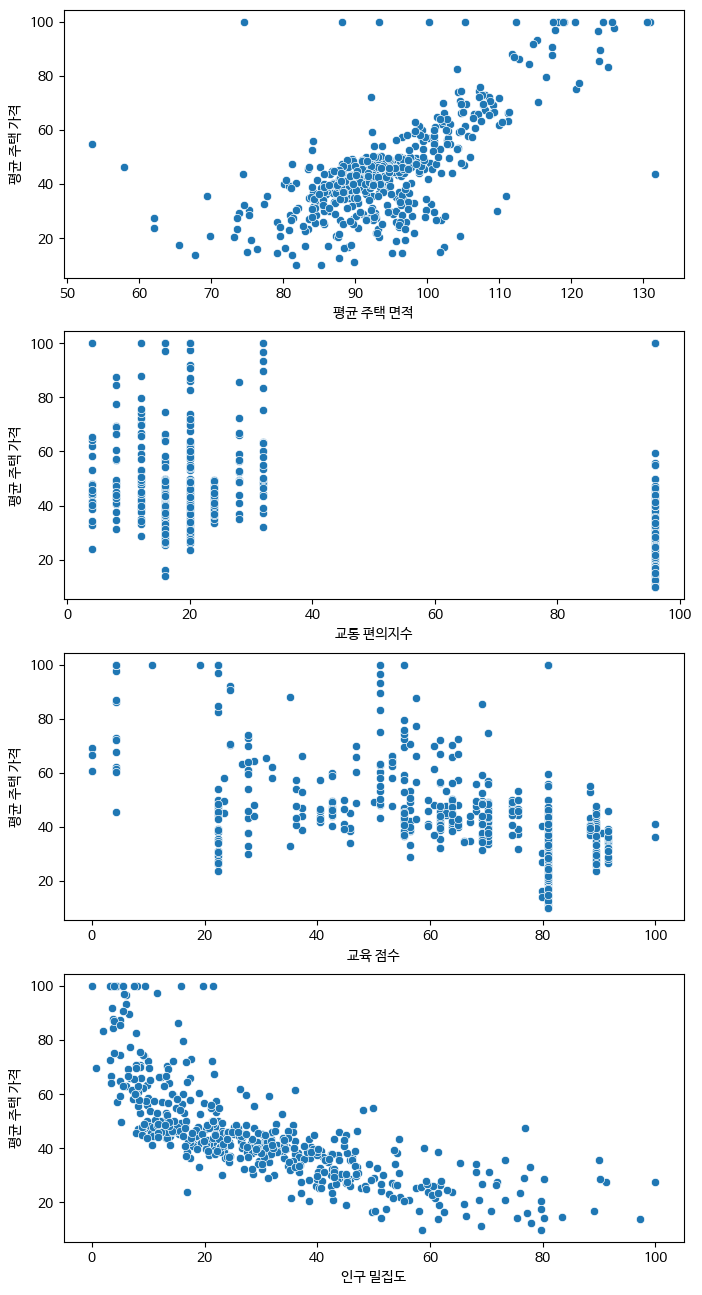

In [7]:
# 데이터 분포 확인 - 산점도
nrows = 4
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns) - 1):
    sns.scatterplot(x=df.columns[i], y='평균 주택 가격', data=df, ax=axs[i])

In [8]:
# 데이터 분포 확인 - 변수 간 상관관계
df.corr()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
평균 주택 면적,1.000000,-0.209952,-0.350765,-0.616391,0.694622
교통 편의지수,-0.209952,1.000000,0.462282,0.481111,-0.374742
교육 점수,-0.350765,0.462282,1.000000,0.368140,-0.500726
인구 밀집도,-0.616391,0.481111,0.368140,1.000000,-0.734713
평균 주택 가격,0.694622,-0.374742,-0.500726,-0.734713,1.000000


<Axes: >

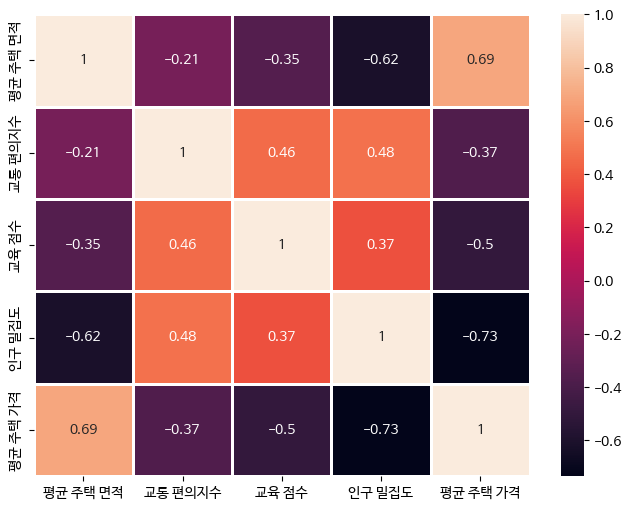

In [9]:
# 데이터 분포 확인 - 변수 간 상관관계(히트맵)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), linewidths=1, annot=True)

# 문제4
`평균 주택 가격`과 가장 상관관계가 높은 특성을 순서대로 출력하시오.

In [10]:
np.abs(df.corr()['평균 주택 가격']).sort_values(ascending=False)

,평균 주택 가격
평균 주택 가격,1.000000
인구 밀집도,0.734713
평균 주택 면적,0.694622
교육 점수,0.500726
교통 편의지수,0.374742


# 문제5
주어진 데이터프레임의 결측치와 중복값이 있는지 확인하고, 있을 경우 삭제하시오.

In [11]:
# 결측값 확인
df.isna().sum()

,0
평균 주택 면적,0
교통 편의지수,0
교육 점수,0
인구 밀집도,0
평균 주택 가격,0


In [12]:
# 중복값 확인
df.duplicated().sum()

0

# 문제6
주어진 데이터를 독립변수(X)와 종속변수(y)로 할당하시오.
- 독립변수(X): ‘평균 주택 가격’을 제외한 모든 속성
- 종속변수(y): ‘평균 주택 가격’


In [13]:
y = df['평균 주택 가격']
X = df.drop(['평균 주택 가격'],axis=1,inplace=False)

#문제 7
문제 6의 독립변수(X)의 데이터의 분포를 평균은 0, 표준편차는 1이 되도록 변환한 값을 `X_scaled`로 할당하시오.

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# 문제8
전처리가 완료된 데이터(`X_scaled`, `y`)를 학습용과 테스트용 데이터로 분할하시오.
-	학습용 데이터와 테스트용 데이터의 비율: 7:3


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#문제9
학습용 데이터를 사용하여 선형회귀 모델을 학습하고, 가중치와 편향을 출력하시오.

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [ 8.37360226 -0.68007229 -3.48014443 -6.39361632]
bias: 44.97676980530395


# 문제10
학습된 선형회귀 모델의 가중치가 가장 높은 변수가 무엇인지 확인하시오.


In [17]:
coef = pd.Series(data=np.round(lr_model.coef_, 1), index=X.columns )
coef

,0
평균 주택 면적,8.4
교통 편의지수,-0.7
교육 점수,-3.5
인구 밀집도,-6.4


<Axes: ylabel='None'>

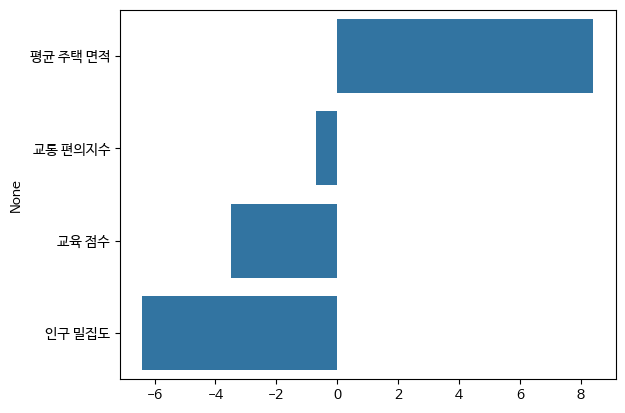

In [18]:
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#문제11
문제9의 선형 회귀 모델의 성능 지표(MSE, RMSE, R-sqaure)를 출력하시오.


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'
    .format(mse , rmse, r2))

y_pred = lr_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 138.472 , RMSE : 11.767, r2 : 0.560


# 문제12
선형 회귀 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행하고, 결과를 출력하시오.
-	선형회귀모델: 문제8에서 생성한 모델
-	3등분하여 학습용과 검증용의 역할을 번갈아 가면서 수행
-	return_train_score=True, return_estimator=True, scoring="neg_mean_squared_error"


In [20]:
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습
scores = cross_validate(lr_model, X, y, scoring="neg_mean_squared_error", cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

Scores {'fit_time': array([0.00607872, 0.00371718, 0.00350142]), 'score_time': array([0.00275803, 0.00276661, 0.00254488]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([ -82.86260072, -114.98382233, -140.51093041]), 'train_score': array([-123.03384583, -106.65114853,  -92.74886566])}


#문제13
테스트 셋에 대해 실제 값(y)과 예측 값(y_pred)의 차이를 확인하기 위해 아래 조건을 만족하는 데이터프레임(result)를 생성하시오.
-	행: 실제 값(y), 예측 값(y_pred), 실제 값과 예측 값의 차이(diff)
-	‘diff’ 컬럼을 기준으로 값이 큰 순서대로 정렬하여 상위 5개의 값만 출력


In [21]:
result = pd.DataFrame({'y': y_test.values,
                       'y_pred': y_pred,
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False).head()


,y,y_pred,diff
76,100.0,33.815985,66.184015
149,100.0,43.033172,56.966828
43,55.0,13.542672,41.457328
12,27.6,-7.328432,34.928432
109,46.2,11.557502,34.642498


#문제14
선형 회귀 모델의 성능을 개선하기 위해 특성 공학을 수행한다. ‘인구 밀집도’와 ‘평균 주택 가격’에 로그 변환을 하여 한쪽으로 치우친 데이터의 분포를 정규 분포 형태에 가깝게 변환하시오. 변환된 데이터를 사용하여 선형 회귀 모델을 학습하고, 성능 지표(MSE, RMSE, R-Square)를 출력하시오.


In [24]:
X_transformed = X.copy()
X_transformed['인구 밀집도'] = np.log1p(X_transformed['인구 밀집도'])
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

MSE : 98.885 , RMSE : 9.944, r2 : 0.686


#문제15
LGBMRegressor 모델을 학습시키고, 특성 중요도를 시각화하시오.
- 각각 100개의 추론기를 가지도록 학습(n_estimator =100)
- 학습 데이터: 문제 7에서 분할한 학습용 데이터 (X_train, y_train)


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

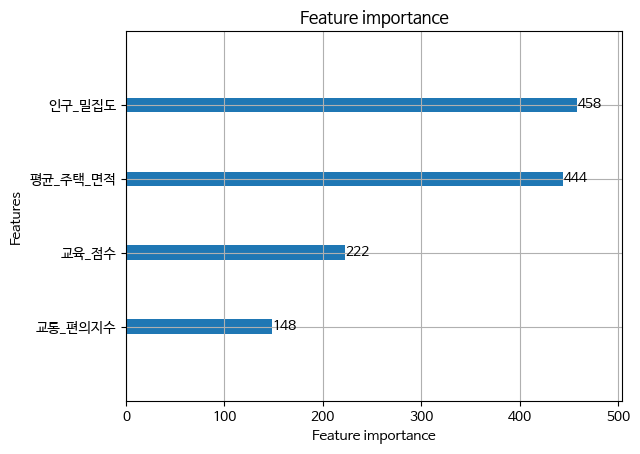

In [26]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

lgb_model = LGBMRegressor(n_estimators=100, random_state=42, verbose = -1)
lgb_model.fit(X_train, y_train)
lgb.plot_importance(lgb_model)